# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.042117e+01     8.414179e+00
 * time: 0.005552053451538086
     1     2.960192e+01     6.667848e+00
 * time: 0.016132831573486328
     2     1.671195e+01     3.723669e+00
 * time: 0.04754996299743652
     3     1.288019e+01     1.614775e+00
 * time: 0.07385587692260742
     4     1.150376e+01     1.570281e+00
 * time: 0.10003805160522461
     5     1.063276e+01     1.736140e+00
 * time: 0.12094497680664062
     6     1.004433e+01     1.359621e+00
 * time: 0.1420578956604004
     7     9.646541e+00     6.409047e-01
 * time: 0.16309285163879395
     8     9.428498e+00     5.258466e-01
 * time: 0.1837480068206787
     9     9.424479e+00     9.836044e-01
 * time: 0.19948196411132812
    10     9.352630e+00     7.357694e-01
 * time: 0.21509099006652832
    11     9.267349e+00     8.183665e-01
 * time: 0.2304830551147461
    12     9.196744e+00     1.256680e+00
 * time: 0.24606800079345703
    13     9.160794e+00     9.557834e-01
 * time: 

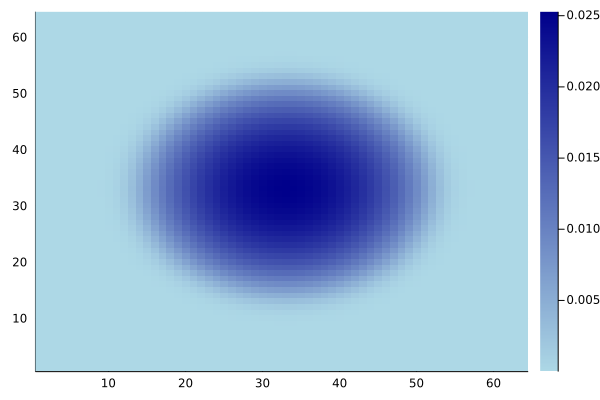

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)